In [11]:
import os
import sys
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from aitia_explorer.py_causal_wrapper import PyCausalWrapper 
from aitia_explorer.metrics.graph_metrics import GraphMetrics
from aitia_explorer.util.graph_util import GraphUtil
from aitia_explorer.target_data.loader import TargetData

# stop the warning clutter
import warnings
warnings.filterwarnings('ignore')

In [5]:
simulated_data = TargetData.simulated_data_1()
simulated_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,1,1,0,0,1,2,0,1,2,1
1,2,1,0,0,1,1,1,0,1,2
2,0,2,1,1,1,0,0,2,2,1
3,0,1,0,0,0,1,2,1,1,1
4,0,1,0,1,1,1,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,1,2,1,1,1
996,1,0,0,2,1,2,2,2,0,0
997,0,1,1,0,0,1,0,2,2,1
998,1,2,0,0,0,2,2,0,1,0


In [2]:
target_graph = TargetData.simulated_data_1_graph()
target_graph

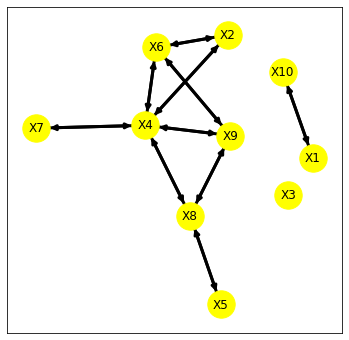

In [12]:
options = {
    'node_color': 'yellow',
    'node_size': 750,
    'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 10,
}
plt.figure(3,figsize=(6,6)) 
pos = nx.kamada_kawai_layout(target_graph)
nx.draw_networkx(target_graph, arrows=True, pos=pos, **options)

In [13]:
wrapper = PyCausalWrapper()
dot_str = wrapper.algo_fci(simulated_data)
pred_graph = GraphUtil.get_digraph_from_dot(dot_str)

Traceback (most recent call last):
  File "/home/seamus/bin/anaconda3/envs/CAUSAL1/lib/python3.7/site-packages/javabridge/jutil.py", line 286, in start_thread
    env = vm.create(args)
  File "_javabridge.pyx", line 654, in _javabridge.JB_VM.create
RuntimeError: Failed to create Java VM. Return code = -1
Failed to create Java VM
Failed to start Java VM


Failed to start Java VM


/home/seamus/bin/anaconda3/envs/CAUSAL1/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/seamus/bin/anaconda3/envs/CAUSAL1/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


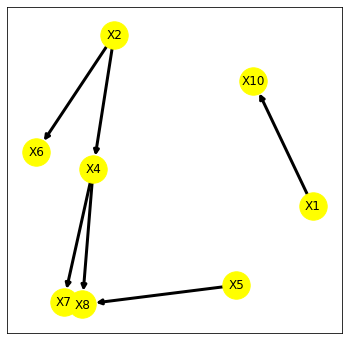

In [7]:
options = {
    'node_color': 'yellow',
    'node_size': 750,
    'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 10,
}
plt.figure(3,figsize=(6, 6)) 
pos = nx.kamada_kawai_layout(pred_graph)
nx.draw_networkx(pred_graph, arrows=True, pos=pos, **options)

In [8]:
metrics = GraphMetrics()
shd = metrics.SHD(target_graph, pred_graph)
shd

14

In [9]:
metrics = GraphMetrics()
pr = metrics.precision_recall(target_graph, pred_graph)
pr

(0.72, [(0.2, 1.0), (1.0, 0.3), (1.0, 0.0)])